> **Student Names and IDs**:
>
> Newton Kwan, nk150 

# Homework 6

## Part 1: Newton's Method

### Problem 1.1

Write a function with header

    def Newton(f, g, H, z0, maxK=1000, delta=hw6.small, , normalize=False):
    
that takes three functions `f`, `g`, `H` that compute value, gradient, and Hessian of some function $f$ and a starting point `z0` (a one-dimensional `numpy` array) and finds a minimum of $f$ by Newton's method. The optional parameter `maxK` is the maximum number of iterations, and `delta` is a threshold on the Euclidean norm of $\mathbf{z}_{k+1} - \mathbf{z}_{k}$. The algorithm stops when that norm falls below `delta`. See the programming notes for the meaning of `normalize`.

Show your code and the value `zNewton[-1]` found by running `Newton` on the Rosenbrock function, starting at $\mathbf{z}_0 = (-1.2, 1)$. Also print out the number of points in `zNewton`.

### Answer

In [79]:
import hw6
import numpy as np 
import math

In [80]:
def Newton(f, g, H, z0, maxK=1000, delta=hw6.small, normalize=False):
    '''
    implementation of Newton's method. returns the input of f that gives the minimum. 
    '''
    
    count = 0 
    answer = [] 
    answer.append(z0)
    dz_norm = 100000 # intialize the norm to a very high number 
    
    while count < maxK:
        
        eig_vals = np.linalg.eigvals(H(z0)) #finds eigenvalues 
        
        if np.all(eig_vals >= 0): # checks if it is positive semi-definite (evals >= 0)
        
            dz = np.dot(np.linalg.pinv(H(z0)), -g(z0))
            z1 = dz + z0 
            dz_norm = np.linalg.norm(dz)  
            if dz_norm < hw6.small:
                break 
            
        if not np.all(eig_vals >= 0): # if even one is negative, use lineSearch()
            z1 = hw6.lineSearch(f, g, z0, delta=hw6.small)
            if normalize:
                if not np.all(z1 == 0):
                    z1 /= np.linalg.norm(z1)
            dz = z1 - z0 
            dz_norm = np.linalg.norm(dz)
            if dz_norm < hw6.small:
                break
         

        if normalize:
            if not np.all(z1 == 0):
                z1 /= np.linalg.norm(z1)
               
        answer.append(z1)
        z0 = z1
        count += 1
        
    return answer


In [81]:
z0 = np.array([-1.2, 1])
zNewton = Newton(hw6.Rosenbrock, hw6.RosenGrad, hw6.RosenHess, z0, maxK=1000, delta=hw6.small, normalize=False) # list of steps 
minNewton = zNewton[-1] # minimum found by Newton 
stepsNewton = len(zNewton) # number of steps taken in Newton 
#print("Values in zNewton", zNewton)
print("The minimum found by Newton's method is", minNewton)
print("Number of points in zNewton:", stepsNewton)

The minimum found by Newton's method is [1. 1.]
Number of points in zNewton: 7


### Problem 1.2

How does the number of iterations from `Newton` compare with that you found for steepest descent in homework 5 on the same optimization problem? You need not give exact numbers.

### Answer

There are orders of magnitude less steps in Newton's method. We take 6 steps in Newton's method to reach the global minimum (first value of zNewton is the starting point). Compare this to the 1000 steps we took in steepest descent using line search and we still did not find the minimum. Trying to use line search with steepest descent in the above function for a 1000 iterations only brings us to [0.91289501 0.83317358], which is still quite a ways from the minimum. Newton's method dramatically trumps steepest descent with line search. 

## Part 2: The Geometry of Newton's Method

### Problem 2.1

Write a function with header

    def ellipse(z0, z1, Hessian, color='red'):
    
that takes two consecutive points `z0` and `z1` on a Newton optimization path and a function `Hessian` that computes the Hessian of some function from $\mathbb{R}^2$ to $\mathbb{R}$ and returns the ellipse $E$ associated with that step.

Show your code and display the ellipse for the first Newton step of your optimization in the previous part.

### Answer

In [82]:
import matplotlib
import matplotlib.pyplot as plt
%precision %g
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['savefig.dpi'] = 120
matplotlib.rcParams['figure.dpi'] = 120
%matplotlib inline

In [83]:
def ellipse(z0, z1, Hessian, color='red'):
    '''
    returns the components needed to describe an ellipse 
    -center of ellipse (tuple in x,y)
    -angle between first axis and reference axis 
    -full lengths 
    '''
    
    # determine center 
    center = z1

    # determine angle     
    H0 = Hessian(z0)
    evals, V = np.linalg.eigh(H0)
    theta_rad = np.arctan2(V[1][0], V[0][0]) # in radians 
    theta = theta_rad * (180/np.pi)          # convert radians to degrees 
    
    # determine width and height 
    dz = z1 - z0
    dzH0 = np.dot(dz, H0)
    a = np.dot(dzH0, dz)                     # scaling factor 
    D = np.diag(evals)                       # square matrix with eigenvalues of H0 on the diagonal 
    Linv = np.sqrt(D/a)
    L = np.linalg.inv(np.sqrt(D / a))
    width = 2*L[0][0]
    height = 2*L[1][1]
    
    ellipse = matplotlib.patches.Ellipse(center, width, height, theta, edgecolor = color, facecolor = 'none')
    
    return ellipse


In [84]:
z0 = zNewton[0]
z1 = zNewton[1]
x0, y0 = z0[0], z0[1]
x1, y1 = z1[0], z1[1]

/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


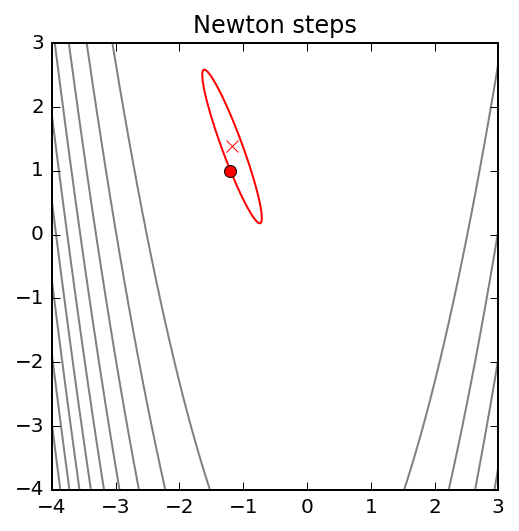

In [85]:
fig, ax = hw6.RosenContours()
ell = ellipse(z0, z1, hw6.RosenHess, color = 'red')
ax.add_artist(ell)  
plt.plot(x0, y0, 'ro')
plt.plot(x1, y1, 'rx')
plt.title("Newton steps")

### Problem 2.2

Make a new plot that displays the ellipses for the first four steps of your Newton optimization path you found in the previous part of this assignment.

Show your code and the resulting plot.

### Answer

In [86]:
# initial and first 4 steps 
z0 = zNewton[0] 
z1 = zNewton[1]
z2 = zNewton[2]
z3 = zNewton[3]
z4 = zNewton[4]
x0, y0 = z0[0], z0[1]
x1, y1 = z1[0], z1[1]
x2, y2 = z2[0], z2[1]
x3, y3 = z3[0], z3[1]
x4, y4 = z4[0], z4[1]

/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


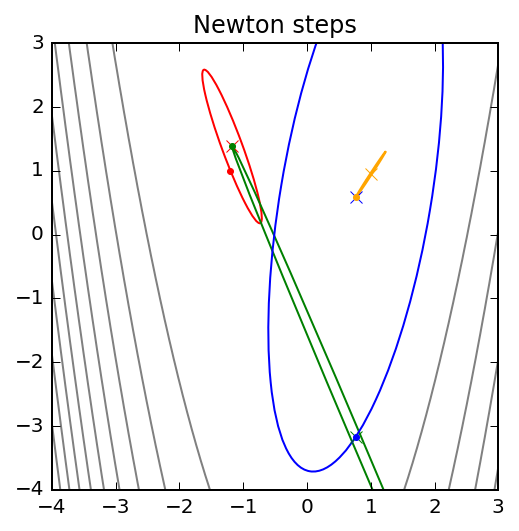

In [87]:
fig, ax = hw6.RosenContours()
ellipse1 = ellipse(z0, z1, hw6.RosenHess, color = 'red')
ellipse2 = ellipse(z1, z2, hw6.RosenHess, color = 'green')
ellipse3 = ellipse(z2, z3, hw6.RosenHess, color = 'blue')
ellipse4 = ellipse(z3, z4, hw6.RosenHess, color = 'orange')
ax.add_artist(ellipse1)  
ax.add_artist(ellipse2)  
ax.add_artist(ellipse3)  
ax.add_artist(ellipse4)  
plt.plot(x0, y0, 'r.')
plt.plot(x1, y1, 'rx')
plt.plot(x1, y1, 'g.')
plt.plot(x2, y2, 'gx')
plt.plot(x2, y2, 'b.')
plt.plot(x3, y3, 'bx')
plt.plot(x3, y3, '.', color = 'orange')
plt.plot(x4, y4, 'x', color = 'orange')
plt.title("Newton steps")

## Part 3: Binary Linear Classifiers

### Problem 3.1

Define functions with headers

    def lossXE(y, p):
    def score(x, v):

that implement the cross-entropy loss and score function for a logistic-regression classifier.

Show your code, and a single diagram that shows the two plots of `lossXE(0, p)` and `lossXE(1, p)` for p between $10^{-3}$ and $1 - 10^{-3}$.

### Answer

In [88]:
T, S = hw6.makeData()

In [89]:
def lossXE(y,p):
    '''
    computes the cross entropy loss 
    '''
    loss = (-y*np.log(p)) - ((1-y)*np.log(1-p))
    return loss

In [90]:
def score(x,v):
    '''
    assigns a p value using the logistic function 
    '''
    a = v[0] + np.dot(v[1:], x)
    a = max(-10, min(10, a))
    score = 1 / (1 + np.exp(-a))
    return score

In [91]:
p_range = np.linspace(10e-3, 1-10e-3, 100) # set up the range of p 

# initialize lists holding losses of y = 0 and y = 1
loss_0 = []
loss_1 = []

for p in p_range:
    
    loss = lossXE(0, p)
    loss_0.append(loss)
    loss = lossXE(1, p)
    loss_1.append(loss)


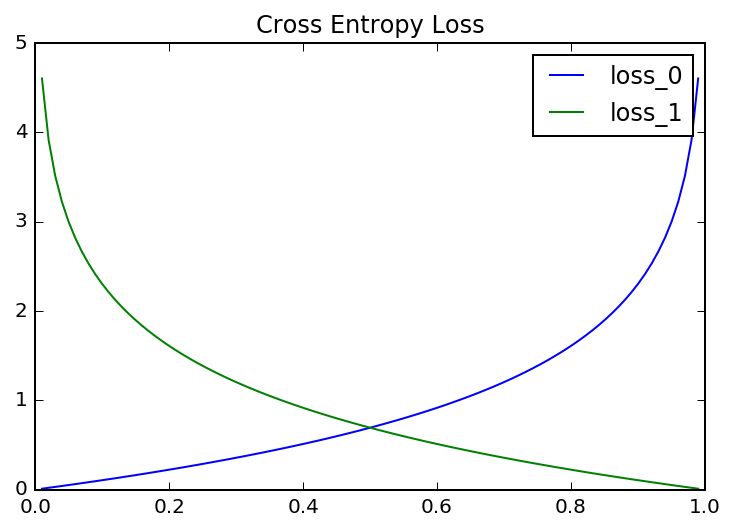

In [92]:
plt.plot(p_range, loss_0, label = 'loss_0')
plt.plot(p_range, loss_1, label = 'loss_1')
plt.title("Cross Entropy Loss")
plt.legend(loc = "upper right")

### Problem 3.2

Define functions with headers

    def riskXE(v):
    def riskXEGrad(v):
    def riskXEHess(v):
    
that implement the cross-entropy risk on set `T` (loaded by `hw6.makeData()`), its gradient, and Hessian, following the formulas in the notes.

Then run your own `Newton` to train the optimal parameter vector $\mathbf{v}$ on `T`, starting with a vector $\mathbf{v}_0$ of all zeros.

Show your code and give the number of iterations to convergence.

### Answer

In [93]:
def riskXE(v):
    '''
    calculates risk of the cross entropy loss 
    '''
    
    risk = 0         # initialize risk to 0 
    N = len(T['x'])  # number of training examples in T 
    x_data = T['x']  
    y_data = T['y']
    
    for i in range(N):
        p = score(x_data[i], v)
        loss = lossXE(y_data[i], p)
        risk += loss
    risk = (1/N) * risk
    
    return risk

In [94]:
def riskXEGrad(v):
    '''
    calculates the risk of the gradient of the cross entropy loss 
    '''
    risk = 0         # initialize risk to 0 
    N = len(T['x'])  # number of training examples in T 
    x_data = T['x']  
    y_data = T['y']
    
    for i in range(N):
        p = score(x_data[i], v)
        constant = p - y_data[i]      # constant to multiply vector by 
        b = np.insert(x_data[i], 0, 1)
        loss = constant*b
        risk += loss
        
    risk = (1/N) * risk
        
    return risk 

In [95]:
def riskXEHess(v):
    '''
    calculates the risk of the Hessian of the cross entropy loss 
    '''
    
    risk = 0
    N = len(T['x'])  # number of training examples in T 
    x_data = T['x']  
    y_data = T['y']
    
    for i in range(N):
        p = score(x_data[i], v)
        constant = p * (1-p)           # constant to multiply matrix by 
        #a = np.array(x_data[i])
        a = x_data[i]
        b = np.insert(a, 0, 1)
        d = np.reshape(b, (len(b), 1))
        loss = constant * d * b
        risk += loss
        
    risk = (1/N) * risk
    
    return risk

In [96]:
# initialize 
m = len(T['x'][0]) + 1 # m = d + 1
v0 = np.zeros(m)       # starting weights are all 0 

In [97]:
zNewton = Newton(riskXE, riskXEGrad, riskXEHess, v0, maxK=30, delta=hw6.small, normalize=True)
print("Length of zNewton:", len(zNewton))

Length of zNewton: 31


### Problem 3.3

Why do we normalize the value of $\mathbf{v}$ at every iteration? Answer this question by explaining why the norm of $\mathbf{v}$ is meaningless for this problem.

### Answer

We want to assign a label $y = 0$ or $y = 1$. The norm of $\textbf{v}$ is meaningless because logistic-regression classification does not care about constants. If they were important, we would need to introduce a scaling factor $f$ and then find a way to determine this value. We're better off without it. 

### Problem 3.4

Write functions with headers

    def h(x, v):
    def risk01(v, S):
    
that implement the logistic-regression classifier $h$ with parameter $\mathbf{v}$ and the zero-one risk on set $S$.

Show your code and the values of _zero-one_ training and test risk for the optimal parameter vector $\mathbf{v}^{\ast}$ you found in the previous problem. Express these risks as _percentage_ values.

### Answer

In [98]:
def h(x, v): 
    '''
    
    '''
    a = v[0] + np.dot(v[1:], x)
    a = max(-10, min(10, a))
    score = 1 / (1 + np.exp(-a))
    
    return score

In [99]:
def risk01(v, S):
    '''
    
    '''
    risk = 0 
    x_data = S['x']
    y_data = S['y']
    N = len(S['x'])
    
    for i in range(N):
        p = h(x_data[i], v_star)
        loss = -y_data[i]*np.log(p) - (1 - y_data[i])*np.log(1-p)
        risk += loss 
        
    answer = (1/N) * risk 
    
    return answer 

In [100]:
v_star = zNewton[-1]               # most optimal found above
test_risk = risk01(v_star, S)      # test set risk 
training_risk = riskXE(v_star)     # training set risk 

In [101]:
print("Training risk:", training_risk)
print("Test risk", test_risk)
print("Percentage training to test risk:", 100 * training_risk / test_risk, "%")

Training risk: 0.38022897757800966
Test risk 0.3949603662545597
Percentage training to test risk: 96.27016026538335 %


The training risk and test risk value are similar; the closer the training and tests risks are to each other, the closer to 100 the percentage will be. From this, I can confidently that this set of parameters will do well on unseen data. 